In [1]:
def check_columns(DataFrame, reports=False, graphs=False, dates=False):
    """
    This function takes a pandas dataframe as input and returns
    a dataframe with information about each column in the dataframe.
    """

    dataframeinfo = []

    # Check information about the index
    index_dtype = DataFrame.index.dtype
    index_unique_vals = DataFrame.index.unique()
    index_num_unique = DataFrame.index.nunique()
    index_num_null = DataFrame.index.isna().sum()
    index_pct_null = index_num_null / len(DataFrame.index)

    if pd.api.types.is_numeric_dtype(index_dtype) and not isinstance(
        DataFrame.index, pd.RangeIndex
    ):
        index_min_val = DataFrame.index.min()
        index_max_val = DataFrame.index.max()
        index_range_vals = (index_min_val, index_max_val)
    elif pd.api.types.is_datetime64_any_dtype(index_dtype):
        index_min_val = DataFrame.index.min()
        index_max_val = DataFrame.index.max()
        index_range_vals = (
            index_min_val.strftime("%Y-%m-%d"),
            index_max_val.strftime("%Y-%m-%d"),
        )

        # Check for missing dates in the index if dates kwarg is True
        if dates:
            full_date_range = pd.date_range(
                start=index_min_val, end=index_max_val, freq="D"
            )
            missing_dates = full_date_range.difference(DataFrame.index)
            if not missing_dates.empty:
                print(
                    f"Missing dates in index: ({len(missing_dates)} Total) {missing_dates.tolist()}"
                )
    else:
        index_range_vals = None

    dataframeinfo.append(
        [
            "index",
            index_dtype,
            index_num_unique,
            index_num_null,
            index_pct_null,
            index_unique_vals,
            index_range_vals,
        ]
    )

    print(f"Total rows: {DataFrame.shape[0]}")
    print(f"Total columns: {DataFrame.shape[1]}")

    if reports:
        describe = DataFrame.describe().round(2)
        print(describe)

    if graphs:
        DataFrame.hist(figsize=(10, 10))
        plt.subplots_adjust(hspace=0.5)
        plt.show()

    for column in DataFrame.columns:
        dtype = DataFrame[column].dtype
        unique_vals = DataFrame[column].unique()
        num_unique = DataFrame[column].nunique()
        num_null = DataFrame[column].isna().sum()
        pct_null = DataFrame[column].isna().mean().round(5)

        if pd.api.types.is_numeric_dtype(dtype):
            min_val = DataFrame[column].min()
            max_val = DataFrame[column].max()
            mean_val = DataFrame[column].mean()
            range_vals = (min_val, max_val, mean_val)
        elif pd.api.types.is_datetime64_any_dtype(dtype):
            min_val = DataFrame[column].min()
            max_val = DataFrame[column].max()
            range_vals = (min_val.strftime("%Y-%m-%d"), max_val.strftime("%Y-%m-%d"))

            if dates:
                full_date_range_col = pd.date_range(
                    start=min_val, end=max_val, freq="D"
                )
                missing_dates_col = full_date_range_col.difference(DataFrame[column])
                if not missing_dates_col.empty:
                    print(
                        f"Missing dates in column '{column}': ({len(missing_dates_col)} Total) {missing_dates_col.tolist()}"
                    )
                else:
                    print(f"No missing dates in column '{column}'")

        else:
            range_vals = None

        dataframeinfo.append(
            [column, dtype, num_unique, num_null, pct_null, unique_vals, range_vals]
        )

    return pd.DataFrame(
        dataframeinfo,
        columns=[
            "col_name",
            "dtype",
            "num_unique",
            "num_null",
            "pct_null",
            "unique_values",
            "range (min, max, mean)",
        ],
    )

# Analyst Job Scraping / Analyzing

## CSV From:

- https://www.kaggle.com/datasets/lukebarousse/data-analyst-job-postings-google-search/data?select=gsearch_jobs.csv

> "This dataset pulls job postings from Google's search results for Data Analyst positions in the United States. <br>
> Data collection started on November 4th, 2022, and adds ~100 new job postings to this dataset daily."

# Acquisition

- I originally intended on pulling all of the data myself using LinkedIn webscraping or another job resource.

- I was able to use a scraper for LinkedIn, but after reading into it, they don't like that and have been known to send cease and desist letters.

- Potential

- Google however, is allowed to scrape LinkedIn, for search engine purposes.

- Using Google's job search, we can then scrape all job postings (which also includes LinkedIn).

- Although we have the capability to scrape the postings ourself, due to the limitations, the amount of data to be useful isn't feasibly with the timeline.

- I found a public dataset that has a head start of 33 thousand job postings. (With duplicates)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [12]:
# Read in job_scrapes

df = pd.read_csv('../support_files/working_docs/jobs.csv')

In [13]:
check_columns(df)

Total rows: 33864
Total columns: 27


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,index,int64,33864,0,0.00000,"RangeIndex(start=0, stop=33864, step=1)",None
1,Unnamed: 0,int64,33864,0,0.00000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(0, 33863, 16931.5)"
2,index,int64,3451,0,0.00000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(0, 3450, 1127.241967871486)"
3,title,object,13049,0,0.00000,"[Data Analyst, Junior Data Analyst/Scientist R...",None
4,company_name,object,8147,0,0.00000,"[Chloeta, Upwork, ATC, Guidehouse, AnMed Healt...",None
5,location,object,635,22,0.00065,"[ Oklahoma City, OK , Anywhere , United ...",None
6,via,object,553,9,0.00027,"[via ZipRecruiter, via Upwork, via LinkedIn, v...",None
7,description,object,24080,0,0.00000,[Job Summary: The Data Analyst oversees data p...,None
8,extensions,object,5491,0,0.00000,"[['21 hours ago', 'Full-time', 'Health insuran...",None
9,job_id,object,33844,0,0.00000,[eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb...,None


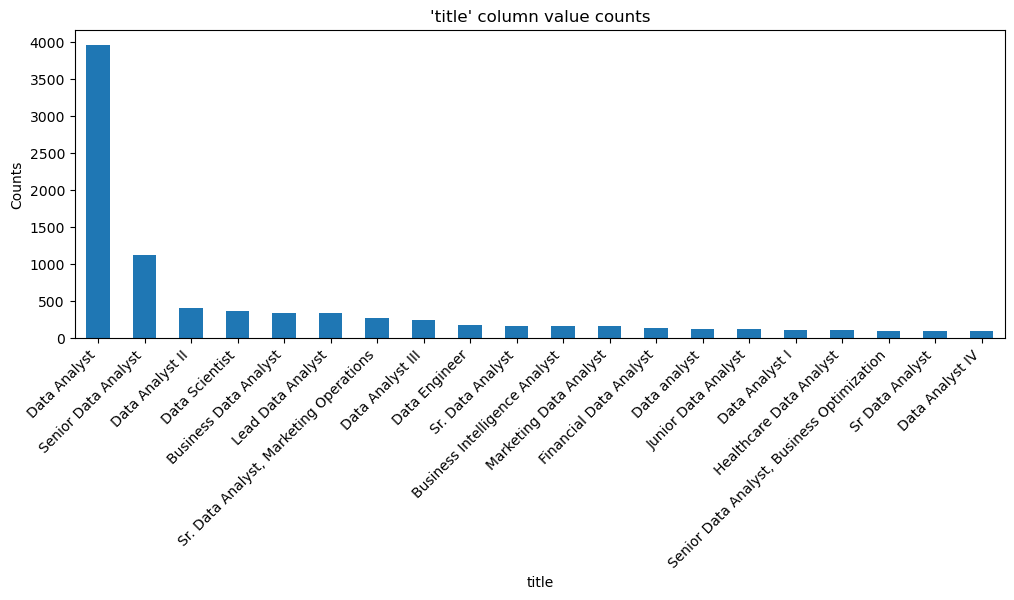

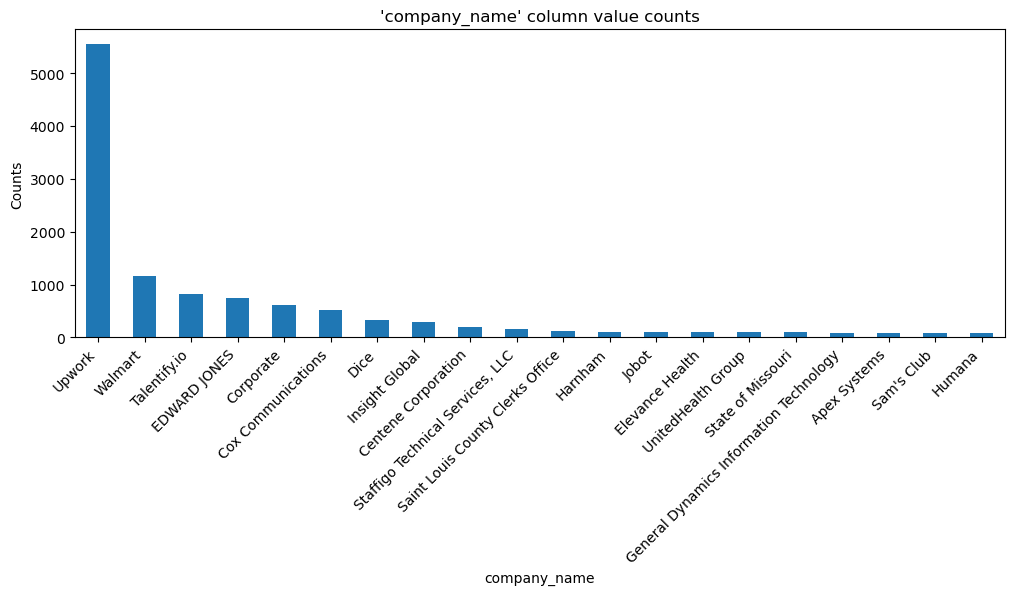

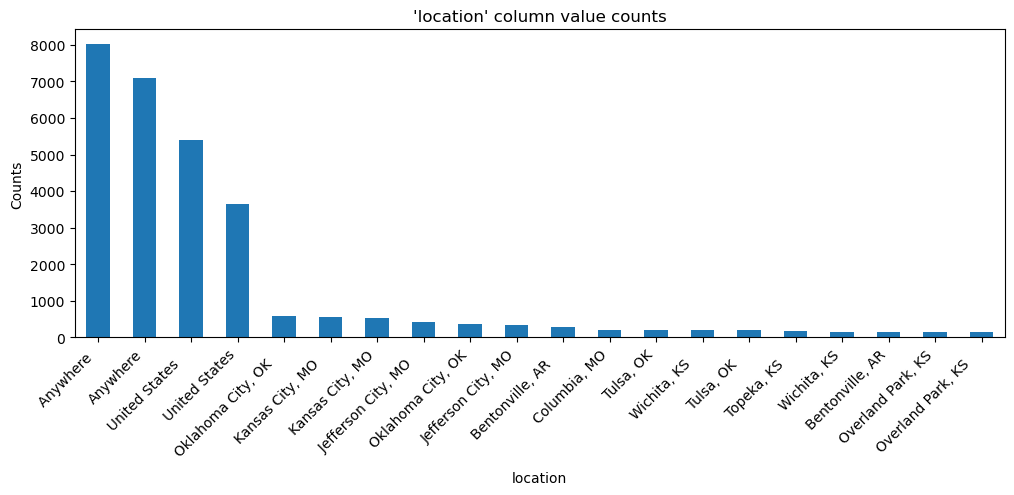

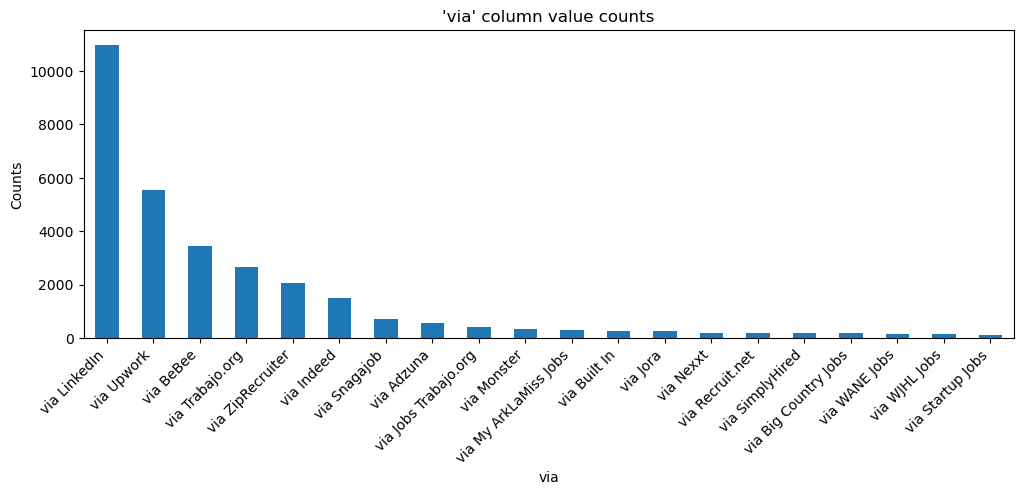

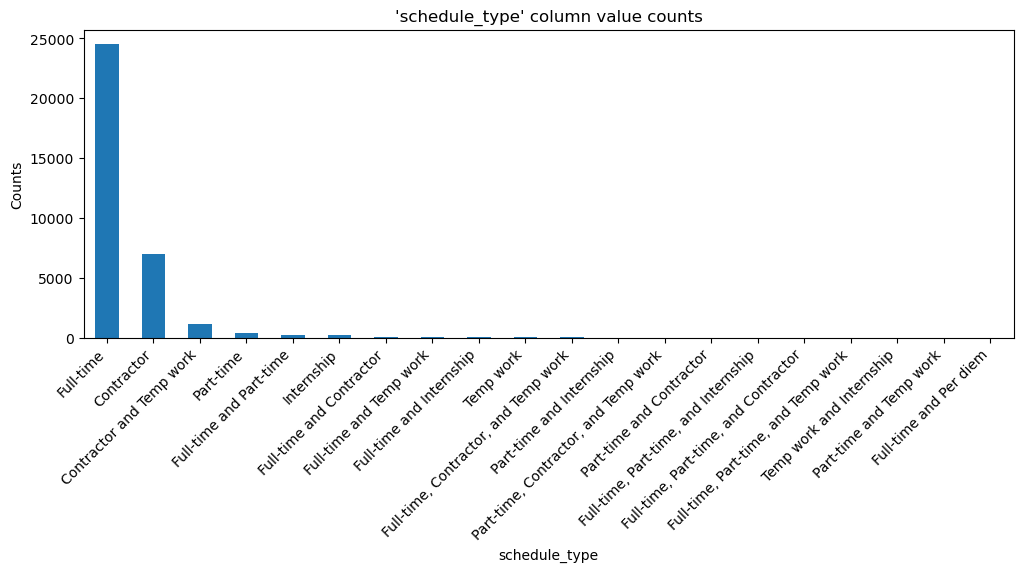

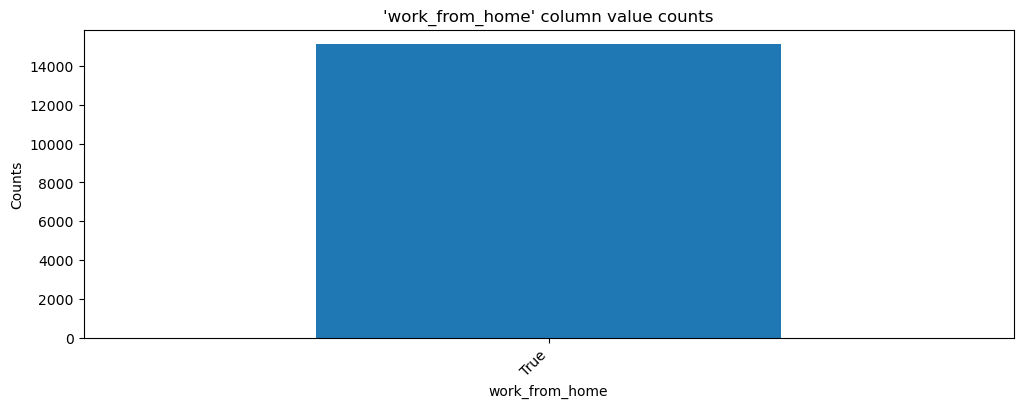

In [14]:
def eda_plot(column, topn=20):
    plt.figure(figsize=(12, 4))
    df[column].value_counts().nlargest(topn).plot(kind='bar')
    plt.title(f"'{column}' column value counts")
    plt.ylabel("Counts")
    plt.xticks(rotation = 45, ha='right')
    plt.show()

columns = ['title', 'company_name', 'location', 'via', 'schedule_type', 'work_from_home']

for column in columns:
        eda_plot(column)

- Further exploration and feature development would be tokenization of popular data science/analyst/engineering skills

- Seeing what are the most requested skills for each

- Seeing what are the most highly compensated skills (using only job postings with pay listed)

- Narrowing down locations where each job type (maybe skills?) are in demand

- Although the data in this case was provided and will be continuously updated, I'd like to make my own webscraper (or API usage)
to pull new data (with Google's job search API or scraping - I am looking to gain experience with Selenium)

- To validate accuracy of data, we could use a regression model to predict pay based on location/skills

- We could also potentially use a classification model to predict the location, job type (analyst/scientist/engineer), based on other features.

- **<u>Ideally if everything else goes well, a deliverable I would really like to include would be a dashboard with drop downs for skills/locations/job title, to demonstrate full stack data science capabilities**

# README WORK

## Overview

##### We downloaded the data from Kaggle as a .csv

1. Decide how to clean / prep the data.

2. Text Preprocessing

2. Explore Separately to see the data from different angles.

3. Feature Extraction

4. Model Training

5. Reusable Functioinality in the Form of a Dashboard




### Project Goal

The goal is to analyze the Data Analyst/Engineer jobs from various recruiting websites and see if we can find what the most requested skills are and which ones are the most highly compensated skills.



### Project Description

- NLP: To find commonalities in posts.
- Classification: To predict the location, job type, etc. based on other features
- Regression: To predict pay based on location/skills
- Dashboard: Possibly include drop down boxes for skill/locations/job titles to demonstrate full stack data science capabilities

### Initial Questions / Hypothesis

1. What skills are most common between job postings?

2. Which skills pay the most?

3. What are the most common locations for work?

4. 

## Acquire

Data was downloaded from Kaggle as a .csv

Link: https://www.kaggle.com/datasets/lukebarousse/data-analyst-job-postings-google-search/data?select=gsearch_jobs.csv

## Clean

In [15]:
df.head()

,Unnamed: 0,index,title,company_name,location,via,description,extensions,job_id,thumbnail,...,commute_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,0,0,Data Analyst,Chloeta,"Oklahoma City, OK",via ZipRecruiter,Job Summary: The Data Analyst oversees data pr...,"['21 hours ago', 'Full-time', 'Health insuranc...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['r', 'python']"
1,1,1,Junior Data Analyst/Scientist Role - Contract ...,Upwork,Anywhere,via Upwork,"Company\n\nThe TAC Index provides independent,...","['17 hours ago', 'Work from home', 'Contractor...",eyJqb2JfdGl0bGUiOiJKdW5pb3IgRGF0YSBBbmFseXN0L1...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['python', 'postgresql', 'mysql', 'pandas', 'r..."
2,2,2,Data Analyst,ATC,United States,via LinkedIn,Job Title: Entry Level Business Analyst / Prod...,"['12 hours ago', 'Full-time', 'Health insurance']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
3,3,3,Data Analyst,Guidehouse,"Topeka, KS",via Nexxt,Job Family :\n\nData Science & Analysis (Digit...,"['10 hours ago', 'Full-time', 'Health insuranc...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['r', 'excel', 'python', 'power_bi', 'qlik', '..."
4,4,4,Data Analyst,AnMed Health LLC,Anywhere,via LinkedIn,"AnMed is a dynamic, comprehensive health syste...","['18 hours ago', 'Work from home', 'Part-time'...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]


In [16]:
df.via.value_counts()

via
via LinkedIn                                 10982
via Upwork                                    5529
via BeBee                                     3435
via Trabajo.org                               2663
via ZipRecruiter                              2048
                                             ...  
via Textron Aviation - Talentify                 1
via Finland                                      1
via GE Jobs                                      1
via HarperCollins Publishers - ICIMS             1
via Performance Contracting Group - ICIMS        1
Name: count, Length: 553, dtype: int64